# Paddy Tutorial
## Optimization of a complex polynomial function

#### In this workbook you will run the Paddy MinMax function. This function is used to find the min or the max of an unknown function. This this example an "unknown" function will be given. You will learn how to use Paddy to find the maximum for this function. The unknown function is a complex polynomial (0.80*exp(-(r1)/(0.3**2))) + (0.88*exp(-(r2)/0.03**2)), where r1=((x-0.5)**2)+((y-0.5)**2) and r2=((x-0.6)**2)+((y-0.1)**2). We want to optimize for x and y. 

In [2]:
#import all the modules needed
import sys
import math
import random
sys.path.append('/home/sanjay/github/Paddy/paddy')
import paddy
import numpy as np 
import time
import matplotlib.pyplot as plt

# /home/sanjay/github/paddy/Paddy_Manuscript_Repo

#### Complex polynomial function being optimized

In [3]:
# This is the function we are trying to optimize

np.random.seed(5)
rs=np.random.RandomState(5)
random.seed(5)

def function_2(input):
    x=input[0,0]
    y=input[1,0]
    r1=((x-0.5)**2)+((y-0.5)**2)
    r2=((x-0.6)**2)+((y-0.1)**2)
    result = (0.80*math.exp(-(r1)/(0.3**2))) + (0.88*math.exp(-(r2)/0.03**2))
    #global maximum at (0.6,0.1) with local at (0.5,0.5)
    return (result)

i = ['generational', 'scaled', 50, 100, 5, False]


y_param = paddy.PaddyParameter(param_range=[0,1,.01],param_type='continuous',limits=[0,1,.1], gaussian=i[1],normalization = i[5])
x_param = paddy.PaddyParameter(param_range=[0,1,.01],param_type='continuous',limits=[0,1,.1], gaussian=i[1],normalization = i[5])

class space(object):
        def __init__(self):
                self.xp = x_param
                self.yp = y_param

test_space = space()
c = 0
g = 0
r_list = []

## Run the cell below to run Paddy

In [4]:
#Run this cell to run Paddy

while c<100:
    runner = paddy.PFARunner(space=test_space, eval_func=function_2,
                            paddy_type=i[0], rand_seed_number=i[2],
                            yt=i[2],Qmax=i[3],r=.02,iterations =i[4])
    s = time.time()
    runner.run_paddy()
    e = time.time() - s
    if max(runner.seed_fitness) > 0.81:
        g +=1
    print(g,c)
    f=(max(runner.seed_fitness))
    p=runner.seed_params[np.argmax(runner.seed_fitness)]
    r_list.append([p,f,e])
    c += 1


p1 = [] 
p2 =[]
for i in r_list:
        p1.append(i[1])
        p2.append(i[2])

np.save("Paddy_MinMax",r_list)

paddy is done!
0 0
paddy is done!
1 1
paddy is done!
1 2
paddy is done!
2 3
paddy is done!
3 4
paddy is done!
3 5
paddy is done!
4 6
paddy is done!
4 7
paddy is done!
5 8
paddy is done!
6 9
paddy is done!
6 10
paddy is done!
7 11
paddy is done!
7 12
paddy is done!
8 13
paddy is done!
9 14
paddy is done!
9 15
paddy is done!
10 16
paddy is done!
11 17
paddy is done!
12 18
paddy is done!
12 19
paddy is done!
13 20
paddy is done!
14 21
paddy is done!
15 22
paddy is done!
16 23
paddy is done!
17 24
paddy is done!
18 25
paddy is done!
18 26
paddy is done!
19 27
paddy is done!
20 28
paddy is done!
21 29
paddy is done!
21 30
paddy is done!
22 31
paddy is done!
23 32
paddy is done!
24 33
paddy is done!
24 34
paddy is done!
25 35
paddy is done!
26 36
paddy is done!
27 37
paddy is done!
28 38
paddy is done!
29 39
paddy is done!
30 40
paddy is done!
31 41
paddy is done!
32 42
paddy is done!
32 43
paddy is done!
33 44
paddy is done!
34 45
paddy is done!
35 46
paddy is done!
35 47
paddy is done!
36 

List of fitness values:
[0.7442593073136494, 0.80506579427238, 0.7999254180910144, 0.9456315351778819, 0.7999558933985335, 0.9686122024827019]
0:seed_seed_22:Fitness:0.7442593073136494  Parameters:
[0.5700000000000001, 0.46]
1:seed_seed_415:Fitness:0.80506579427238  Parameters:
[0.6141752760883118, 0.10527134642760108]
2:seed_seed_1078:Fitness:0.7999254180910144  Parameters:
[0.49718747081498854, 0.5006932066641412]
3:seed_seed_2024:Fitness:0.9456315351778819  Parameters:
[0.6000133550617424, 0.092902941841976]
4:seed_seed_3560:Fitness:0.7999558933985335  Parameters:
[0.4986131164123293, 0.501743181966884]
5:seed_seed_4979:Fitness:0.9686122024827019  Parameters:
[0.6001259594393356, 0.09472832115902952]


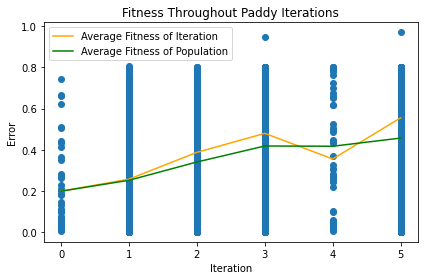

In [5]:
#Results
runner.get_top_seed()
runner.paddy_plot_and_print('pop_fitness')
runner.paddy_plot_and_print('final_results')
#plotting the results
runner.paddy_plot_and_print(('scatter','average_gen','average_population'))

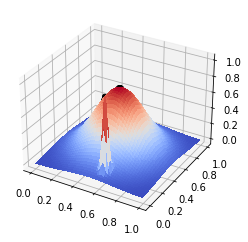

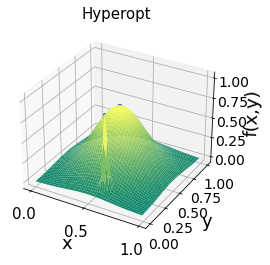

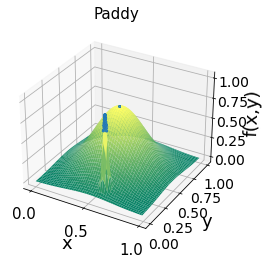

In [12]:
###Surface plot
#from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import math


def function_2(x,y):
    r1=((x-0.5)**2)+((y-0.5)**2)
    r2=((x-0.6)**2)+((y-0.1)**2)
    result = (0.80*math.exp(-(r1)/(0.3**2))) + (0.88*math.exp(-(r2)/0.03**2))
    #global maximum at (0.6,0.1) with local at (0.5,0.5)
    return (result)


X = np.arange(0, 1, 0.01)
Y = np.arange(0, 1, 0.01)
X, Y = np.meshgrid(X, Y)

Z = np.empty([100,100])

c = 0
for i in Z:
	c2 = 0
	for i2 in i:
		Z[c][c2] = function_2(X[c][c2],Y[c][c2])
		c2 += 1
	c += 1

h_list = np.load('/home/sanjay/github/Paddy/Paddy_Manuscript_Repo2/Paddy_Manuscript_Repo/Plotting/MinMax/Hyperopt_MinMax.npy')

xs=[]
ys=[]
zs=[]
for i in h_list:
	xs.append(i[0]['x'])
	ys.append(i[0]['y'])
	zs.append(-i[1])

p_list = np.load('/home/sanjay/github/Paddy/Paddy_Manuscript_Repo2/Paddy_Manuscript_Repo/Plotting/MinMax/Paddy_MinMax.npy')

xs2=[]
ys2=[]
zs2=[]
for i in p_list:
	xs2.append(i[0][0][0])
	ys2.append(i[0][1][0])
	zs2.append(i[1])


fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

pos = ax.scatter(xs,ys,zs,c='k')

plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.summer)
pos = ax.scatter(xs,ys,zs,s=5,c='#8ac6d1ff',edgecolors='#1f77b4ff')
ax.set_zlabel('f(x,y)',fontsize=18)
ax.set_xlabel('x',fontsize=18)
ax.set_ylabel('y',fontsize=18)
ax.zaxis.set_tick_params(labelsize=14,size=15)
ax.xaxis.set_tick_params(labelsize=15,size=15)
ax.yaxis.set_tick_params(labelsize=14,size=15)
ax.set_title('Hyperopt',fontsize=15)
plt.savefig(fname='hpf2.svg',dpi=300)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.summer)
pos = ax.scatter(xs2,ys2,zs2,s=2,c='#8ac6d1ff',edgecolors='#1f77b4ff')
ax.set_zlabel('f(x,y)',fontsize=18)
ax.set_xlabel('x',fontsize=18)
ax.set_ylabel('y',fontsize=18)
ax.zaxis.set_tick_params(labelsize=14,size=15)
ax.xaxis.set_tick_params(labelsize=15,size=15)
ax.yaxis.set_tick_params(labelsize=14,size=15)
ax.set_title('Paddy',fontsize=15)
plt.savefig(fname='paddyf2.svg',dpi=300)
plt.show()